<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 37.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 85.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 80.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 69.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 20.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138964 sha256=f338eed96cfe29b3a7a385c88c6d490

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Display information about Tesla stock (optional)
print(tesla_ticker.info)


{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
# Extract historical stock data for the maximum period and save it in a DataFrame
tesla_data = tesla_ticker.history(period="max")

# Display the first few rows of the DataFrame to verify
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [9]:
# Importando a biblioteca yfinance
import yfinance as yf

# Crie um objeto Ticker para a Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extraia o histórico de ações da Tesla para o período máximo
tesla_data = tesla_ticker.history(period="max")

# Redefina o índice do DataFrame
tesla_data.reset_index(inplace=True)

# Exiba as cinco primeiras linhas do DataFrame
print(tesla_data.head)


<bound method NDFrame.head of                           Date        Open        High         Low  \
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3625 2024-11-21 00:00:00-05:00  343.809998  347.989990  335.279999   
3626 2024-11-22 00:00:00-05:00  341.089996  361.529999  337.700012   
3627 2024-11-25 00:00:00-05:00  360.140015  361.929993  338.200012   
3628 2024-11-26 00:00:00-05:00  341.000000  346.959991  335.660004   
3629 2024-11-27 00:00:00-05:00  341.970001  342.549988  326.589996   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667  2

In [10]:
# Extract historical stock data for the maximum period and save it in a DataFrame
tesla_data = tesla_ticker.info

# Display the first few rows of the DataFrame to verify
print(tesla_data)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [11]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data for the maximum period and save it in a DataFrame
tesla_data = tesla_ticker.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [12]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to download the webpage
response = requests.get(url)

# Save the content of the response as a variable
html_data = response.text

# Verify the download by printing part of the content
print(html_data)  # Display the first 500 characters



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [13]:
from bs4 import BeautifulSoup

# Parse the HTML data with BeautifulSoup using html.parser
soup = BeautifulSoup(html_data, "html.parser")

# Alternatively, you can use html5lib if you prefer
# soup = BeautifulSoup(html_data, "html5lib")

# Check the parsed content by printing a part of it
print(soup.prettify()[:500])  # Print the first 500 characters to verify


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


In [14]:
import pandas as pd
from bs4 import BeautifulSoup
# Assuming `html_data` already contains the HTML content
soup = BeautifulSoup(html_data, "html.parser")
# Find the relevant table body
table_body = soup.find_all("tbody")[1]
# Initialize an empty list to collect rows
rows = []
# Iterate through each row in the table body
for row in table_body.find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()     # Extract and clean the Date
    revenue = cols[1].text.strip()   # Extract and clean the Revenue
    # Append the row data as a dictionary to the list
    rows.append({"Date": date, "Revenue": revenue})
# Convert the list of rows to a DataFrame
tesla_revenue = pd.DataFrame(rows)
# Display the first few rows to verify the data
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [15]:
import pandas as pd
from bs4 import BeautifulSoup

# Supondo que o HTML já está carregado em `html_data`
soup = BeautifulSoup(html_data, "html.parser")

# Localizando o segundo <tbody>
table_body = soup.find_all("tbody")[1]

# Inicializando a lista de linhas
rows = []

# Iterando pelas linhas do <tbody>
for row in table_body.find_all("tr"):
    cols = row.find_all("td")
    # Garantindo que há ao menos duas colunas (Date e Revenue)
    if len(cols) >= 2:
        date = cols[0].text.strip()    # Data
        revenue = cols[1].text.strip() # Receita
        rows.append({"Date": date, "Revenue": revenue})

# Convertendo para DataFrame
tesla_revenue = pd.DataFrame(rows)

# Exibindo as primeiras linhas para verificação
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [16]:
import pandas as pd

# Lendo todas as tabelas do HTML
tables = pd.read_html(html_data)

# Selecionando a tabela do índice 1
tesla_revenue = tables[1]

# Renomeando colunas para consistência (se necessário)
tesla_revenue.columns = ["Date", "Revenue"]

# Exibindo as primeiras linhas
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [17]:
# Remover valores que não são trimestrais (opcional)
tesla_revenue = tesla_revenue.dropna()

# Limpando a coluna Revenue (removendo símbolos de moeda)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace('[\$,]', '', regex=True).astype(float)

print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0


/tmp/ipykernel_82/2691789257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace('[\$,]', '', regex=True).astype(float)


In [18]:
make_graph(stock_data, revenue_data, "Stock Name")

NameError: name 'stock_data' is not defined

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [47]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [19]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

/tmp/ipykernel_82/2294102858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue.dropna(inplace=True)


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [20]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [21]:
import yfinance as yf

# Create a Ticker object for GameStop using its ticker symbol 'GME'
gme_ticker = yf.Ticker("GME")

# Display basic information to verify
print(gme_ticker.info)


{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [22]:
import yfinance as yf

# Create a Ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract stock information and save it in a DataFrame
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the DataFrame to verify
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [23]:
import yfinance as yf

# Create a Ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract stock information and save it in a DataFrame
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [24]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as html_data_2
html_data_2 = response.text

# Display the first few characters of html_data_2 to verify
print(html_data_2[:1000])  # Displaying the first 1000 characters for brevity


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [25]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup with the html.parser
soup = BeautifulSoup(html_data_2, "html.parser")

# Optionally, print the parsed HTML to verify
print(soup.prettify()[:1000])  # Displaying the first 1000 characters for brevity


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

In [26]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [27]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup with html5lib
soup = BeautifulSoup(html_data_2, "html5lib")

# Optionally, print the parsed HTML to verify
print(soup.prettify()[:1000])  # Displaying the first 1000 characters for brevity


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [28]:
import pandas as pd
from bs4 import BeautifulSoup
# Assuming html_data_2 contains the HTML content
soup = BeautifulSoup(html_data_2, "html.parser")
# Find the relevant table (assuming it is the first table in the soup)
table = soup.find_all("table")[0]  # Change the index if needed
# Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Iterate through rows in the table body
for row in table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    date = cols[0].text.strip()  # Extract and clean the Date
    revenue = cols[1].text.strip()  # Extract and clean the Revenue
    # Clean the revenue by removing commas and dollar signs
    revenue = revenue.replace('$', '').replace(',', '')
    # Append the data to the DataFrame
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
# Convert Revenue column to numeric
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')
# Display the first few rows to verify the data
print(gme_revenue.tail())

    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [29]:
# Display the last 5 rows of the gme_revenue DataFrame
print(gme_revenue.tail())

    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 121.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 116.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 108.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.8 MB/s eta 0:00:00


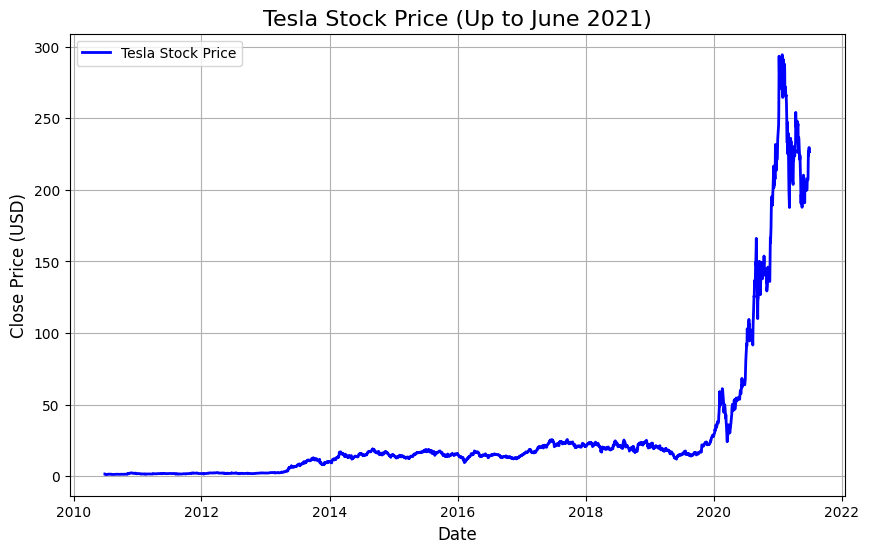

In [31]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Baixar os dados históricos da Tesla
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")

# Reiniciar o índice para garantir que a coluna Date seja acessível
tesla_data.reset_index(inplace=True)

# Filtrar os dados até junho de 2021
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
filtered_data = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Definir a função para criar o gráfico
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], color='blue', label='Tesla Stock Price', linewidth=2)
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Usar a função para plotar o gráfico
make_graph(filtered_data, "Tesla Stock Price (Up to June 2021)")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


AttributeError: 'America/New_York' object has no attribute 'update'

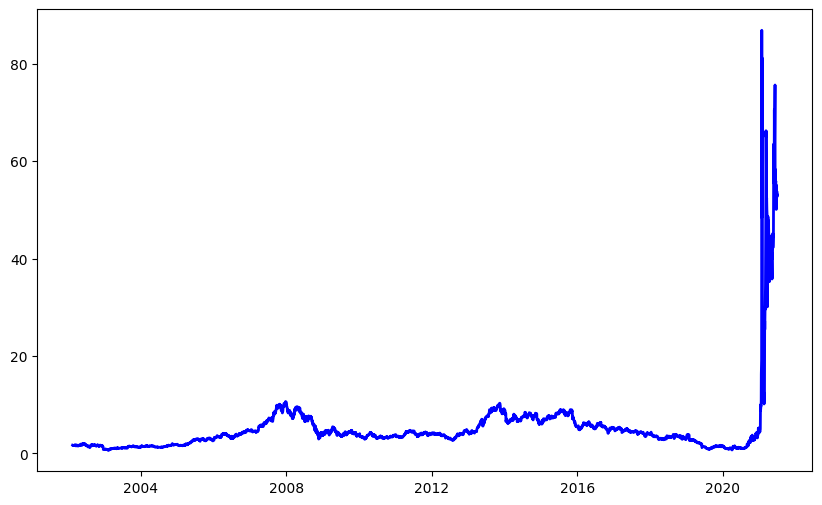

In [32]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Supondo que html_data_2 contenha os dados HTML da tabela com as receitas
soup = BeautifulSoup(html_data_2, "html.parser")

# Encontrar a tabela relevante (presumindo que é a primeira tabela no soup)
table = soup.find_all("table")[0]  # Alterar o índice se necessário

# Criar um DataFrame vazio para armazenar a receita
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterar pelas linhas da tabela (ignorando a linha de cabeçalho)
for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    date = cols[0].text.strip()  # Extrair e limpar a data
    revenue = cols[1].text.strip()  # Extrair e limpar a receita
    revenue = revenue.replace('$', '').replace(',', '')  # Limpar a receita
    # Adicionar os dados ao DataFrame
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Converter a coluna de receita para numérico
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Exibir as últimas linhas para verificar os dados
print(gme_revenue.tail())

# Baixar os dados históricos da GameStop usando yfinance
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")

# Reiniciar o índice para garantir que a coluna 'Date' seja acessível
gme_data.reset_index(inplace=True)

# Filtrar os dados até junho de 2021
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
filtered_gme_data = gme_data[gme_data['Date'] <= '2021-06-30']

# Definir a função make_graph
def make_graph(gme_data, gme_revenue, title):
    plt.figure(figsize=(10, 6))
    
    # Plotar os dados de ações da GameStop (preço de fechamento)
    plt.plot(gme_data['Date'], gme_data['Close'], color='blue', label='GameStop Stock Price', linewidth=2)
    
    # Plotar os dados de receita da GameStop
    plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='red', label='GameStop Revenue', linestyle='--', linewidth=2)
    
    # Adicionar título e rótulos
    plt.title(f'{title} Stock and Revenue', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value (USD)', fontsize=12)
    plt.grid(True)
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

# Usar a função para criar o gráfico
make_graph(filtered_gme_data, gme_revenue, 'GameStop')


    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


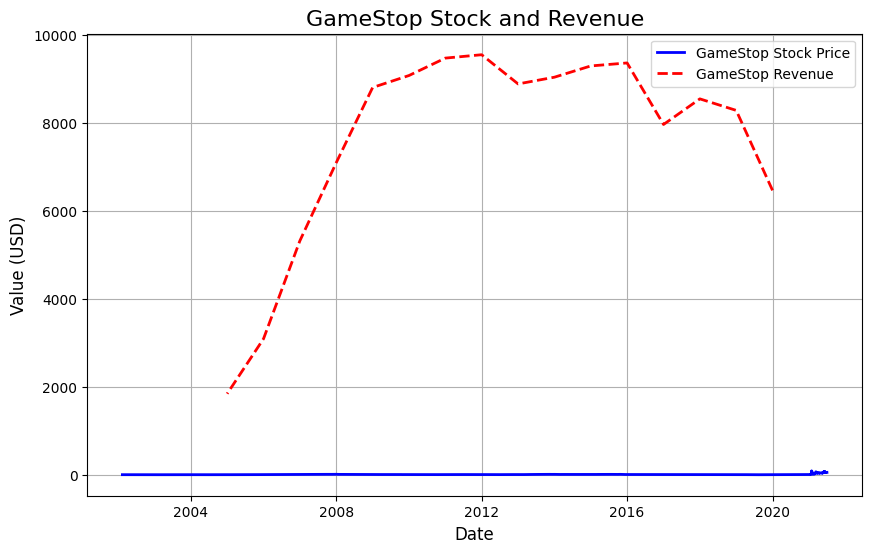

In [33]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Supondo que html_data_2 contenha os dados HTML da tabela com as receitas
soup = BeautifulSoup(html_data_2, "html.parser")

# Encontrar a tabela relevante (presumindo que é a primeira tabela no soup)
table = soup.find_all("table")[0]  # Alterar o índice se necessário

# Criar um DataFrame vazio para armazenar a receita
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterar pelas linhas da tabela (ignorando a linha de cabeçalho)
for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    date = cols[0].text.strip()  # Extrair e limpar a data
    revenue = cols[1].text.strip()  # Extrair e limpar a receita
    revenue = revenue.replace('$', '').replace(',', '')  # Limpar a receita
    # Adicionar os dados ao DataFrame
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Converter a coluna de receita para numérico
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Exibir as últimas linhas para verificar os dados
print(gme_revenue.tail())

# Baixar os dados históricos da GameStop usando yfinance
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")

# Reiniciar o índice para garantir que a coluna 'Date' seja acessível
gme_data.reset_index(inplace=True)

# Filtrar os dados até junho de 2021
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
filtered_gme_data = gme_data[gme_data['Date'] <= '2021-06-30']

# Garantir que as datas de gme_revenue também sejam convertidas corretamente
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], errors='coerce')

# Definir a função make_graph
def make_graph(gme_data, gme_revenue, title):
    plt.figure(figsize=(10, 6))
    
    # Plotar os dados de ações da GameStop (preço de fechamento)
    plt.plot(gme_data['Date'], gme_data['Close'], color='blue', label='GameStop Stock Price', linewidth=2)
    
    # Plotar os dados de receita da GameStop
    plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='red', label='GameStop Revenue', linestyle='--', linewidth=2)
    
    # Adicionar título e rótulos
    plt.title(f'{title} Stock and Revenue', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value (USD)', fontsize=12)
    plt.grid(True)
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

# Usar a função para criar o gráfico
make_graph(filtered_gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
